<div style="background-color:#9DBC98; color:#294B29;">
    <h1><center>Analyzing Trends and Forecasting Road Accident in the United Kingdom</center></h1>
</div>

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Introduction</center></h1>
</div>

Urban data science is the use of data science methods to examine and comprehend urban environments and processes with a focus on spatial elements because they are essential to understanding the dynamics of urban life and its difficulties. It includes tasks such as data gathering, transformation, modelling, and visualization. To evaluate and forecast accident severity and offer insights that may improve urban safety and planning, this research focuses on accident data from the United Kingdom.

Since traffic accidents have a big impact on urban growth and health, they are a major problem in the UK. Reducing the frequency and severity of road accidents requires an awareness of the major contributing elements, which makes road safety a crucial component of public safety. The global road safety problem is a critical issue, with the WHO estimating that 1.25 million people worldwide lose their lives and up to 50 million are injured in traffic accidents annually (WHO, 2015). Roughly 1.3 million casualties of all severities were reported in the UK alone in 2022 (DfT, 2023).


Moreover, establishing predictive models for accident severity and comprehending the contributing variables to traffic accidents can result in safer solutions. It gives engineers, urban planners, and legislators the ability to put evidence based plans for reducing traffic fatalities and major injuries into practice. Identifying the factors such as location, risky behaviors, age and sex of driver, type of vehicle, day of week, speed limit, and environmental factors like time of day can all contribute to road accidents.

Proactive and focused safety measures can be implemented by using predictive models and data-driven insights to help predict accident trends. To properly address road safety, these forecasts are crucial for allocating personnel, resources, and laws. Considering the global concerns surrounding road safety, examining the primary causes of road accidents in the UK and their effects on accident severity is important for both urban growth and health as well as for creating a safer and more sustainable urban environment.

The topic's broad implications for urban development, public safety, and economic well-being, are significant, practical, and deserving of further study. The development of prediction models and an understanding of the elements that contribute to road accidents can open the door to evidence-based solutions that reduce accident severity, increase road safety, and save lives both within and outside of the United Kingdom.

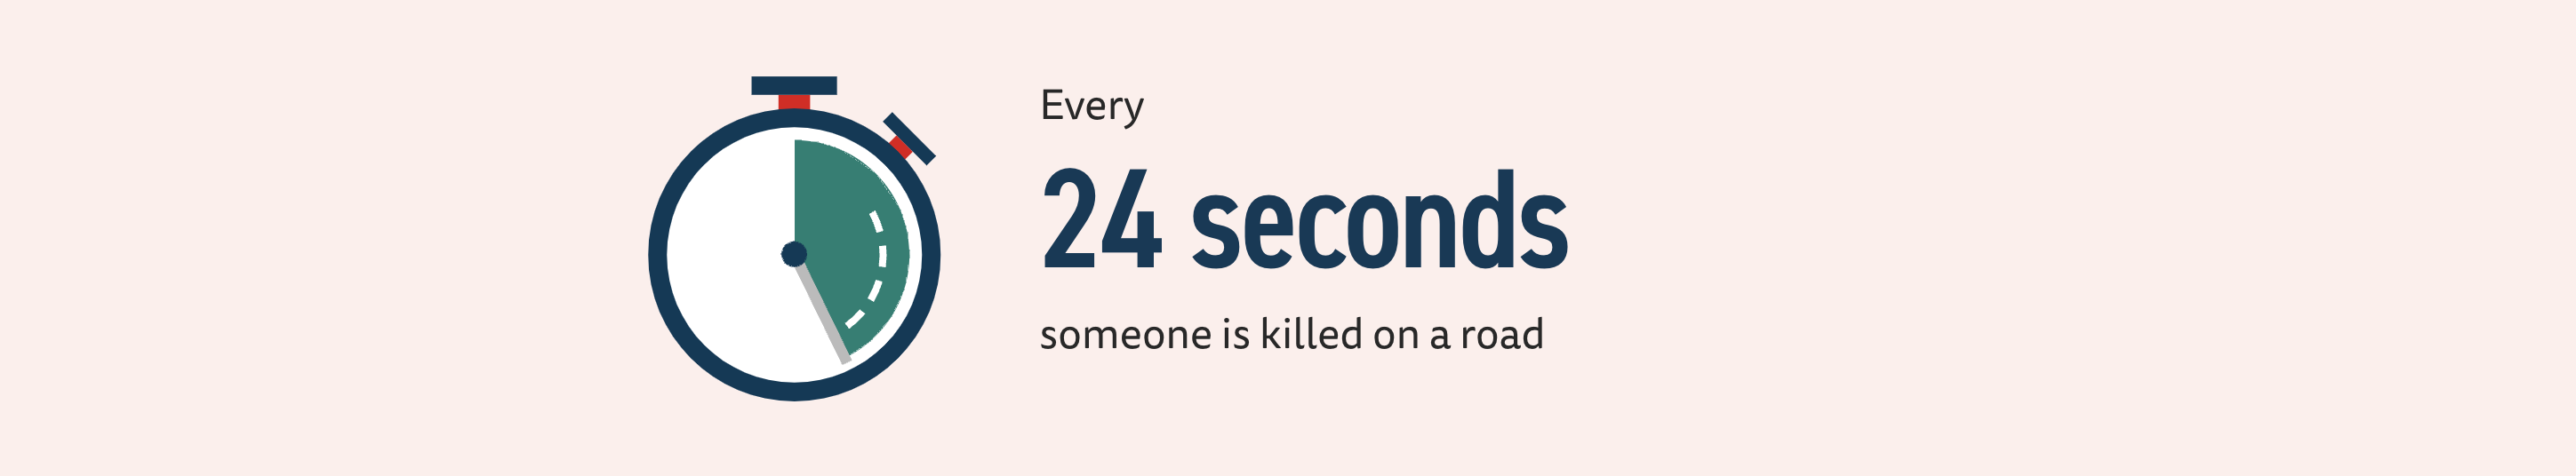

Image Source: https://www.brake.org.uk/get-involved/take-action/mybrake/knowledge-centre/global-road-safety

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Research Question</center></h1>
</div>

What are the key contributing factors to road accidents in the United Kingdom, and how can these characteristics be utilised to predict the severity of an accident?

What are the projected trends for the number of accidents, and how accurate is the model's forecast compared to real historical data?

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Data</center></h1>
</div>

The Department for Transport (DfT) publishes the Road Safety Statistics, an extensive and reliable source of information on accidents resulting in personal injuries in Great Britain, which is where the dataset used in this urban project originated.

**Origin**

The Department for Transport is the main source of the statistics which makes the data publicly accessible, and it can be found on the following website 

https://data.gov.uk/dataset/road-accidents-safety-data 


**Collection**

The dataset used in this study is an extensive collection of data on road safety related to crashes resulting in personal injuries in Great Britain, dating back to 1979. This dataset offers comprehensive details regarding the types of cars involved, the circumstances leading up to these collisions, and the number of casualties as a result. It should be noted that these statistics only include crashes resulting in personal injuries that happen on public roads, are reported to the police, and then entered the STATS19 collision reporting form and are now available in different file formats such as CSV. Instead of using textual strings, the dataset mostly uses coded variables; lookup tables for these codes can be found in the supporting documents section.

**Information**

It has comprehensive information on road safety addressing events surrounding accidents resulting in injuries and death with detailed vehcile and casualties information involved in road incidents.

**Selection**

The original three files from which the dataset for this research was derived were collision, casualty, and vehicle. It covers an extensive period, from 1979 to 2022, and includes a wide range of UK road safety occurrences.

The dataset was carefully selected and constrained to particular time periods to be used for this study. The years 2005 through 2015 are the focus of the data that was chosen for analysis and model development. This subset of the information is the main source for determining the major causes of road accidents and developing accident severity prediction models for the current decade.

A distinct validation dataset, containing information from 2016 to 2019, was extracted in addition to the analytical dataset. To assess the models generalizability and dependability in forecasting accident severity trends outside of the examined timeframe, it offers an independent set of data.

Considering that data was available until 2022, the decision was made to restrict the dataset to 2019 due to the circumstances surrounding the COVID-19 outbreak. Since this study forecasts accident patterns using time series, it may create unanticipated disruptions and problems for the predictive algorithms, particularly during the COVID-19 period. Therefore, the dataset was limited to data up to 2019, allowing for more stable and trustworthy forecasts beyond that point. 

Two final datasets, "accident_analysis (2005-2015)" and "accident_validation (2016-2019)" were produced following intensive data wrangling to support the study approach. These datasets show how feature extraction, data cleaning, and preprocessing have come together to provide data that is ready for modelling and analysis.


**Importance**

The dataset is quite informative and will be crucial in answering the research issues this study poses. It will specifically assist in determining the primary contributors to road accidents in the UK. This study can help to learn more about the causes and severity of accidents by examining variables like the type of road, the age and gender of the driver, and different environmental conditions. Furthermore, this dataset will be used as the basis for predictive model development to precisely predict accident severity and evaluate anticipated trends for accident frequency.

This data is crucial to the study effort because it offers the factual basis needed to address important concerns about road safety and accident avoidance in the United Kingdom. In the end, it helps to establish evidence-based policies for enhancing road safety and lowering accident severity by enabling us to use data science tools to find patterns, correlations, and trends in data on traffic accidents.

## Importing Libraries

In [ ]:
#ignoreing irrelevant warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt; plt.style.use('seaborn-whitegrid')
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.offline as pyo
from plotly.subplots import make_subplots
from datetime import date
import geopandas as gpd
from shapely.geometry import Point, Polygon
import colorlover as cl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
from pmdarima import auto_arima
import gc

## Original Dataset

The analysis starts with opening three raw road safety data, which consisted of three main files: "collision," "vehicle," and "casualty." Additionally, the lookup table provides comprehensive details on the coded variables used in the dataset.

Collision(1979–2022).csv: Comprehensive data on road safety addressing events surrounding accidents resulting in injuries in Great Britain such as the location of the accident (geographical coordinates, police presence, severity), the temporal information (date, day of the week, time), the particulars of the local government, the type and classification of the road, speed limits, junction details, pedestrian crossing information, light, weather, road surface conditions, and the classification of the area as urban or rural. It also gives information on the police presence at the scene.

Vehicle (1979–2022): It includes vehicle information associated with the accident such as type of vehicle, towing details, Information about vehicle movements, directions, and locations with circumstances of the accident involving the vehicles. Driver-related details, including sex, age, and vehicle-specific characteristics, such as engine capacity, propulsion code, vehicle age, and model also recorded. 

Casualties (1979–2022): The "Casualties Data" dataset includes important details about the people impacted by these accidents. It includes Demographic information about the casualties, including their sex, age, and severity. Details related to the casualties roles and involvement in the accident. 

**Note:** The dataset that is attached to this notebook (accident_analysis_uk_pred.csv and accident_analysis_uk_pred.csv) has previously been through data wrangling procedures and is prepared for analysis, making it a more shareable and manageable file. Not all of the data could included with this notebook due to the large file size.

In [ ]:
# accident_79 = pd.read_csv("Data/dft-road-casualty-statistics-collision-1979-latest-published-year.csv")

In [ ]:
# vehicle_79 = pd.read_csv("Data/dft-road-casualty-statistics-vehicle-1979-latest-published-year.csv")

In [ ]:
# casualties_79 = pd.read_csv("Data/dft-road-casualty-statistics-casualty-1979-latest-published-year.csv")

#### View the Files

In [ ]:
# accident_79.head()

In [ ]:
# accident_79.info()

In [ ]:
# vehicle_79.head()

In [ ]:
# vehicle_79.info()

In [ ]:
# casualties_79.head()

In [ ]:
# casualties_79.info()

In [ ]:
# Import lookup table
# code_info = pd.read_excel("Data/dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2023.xlsx")

In [ ]:
# code_info.head()

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Data Wrangling</center></h1>
</div>

## Data Preparation

"accidents_05_15" for the analysis period from 2005 to 2015 and "accident_valid_16_19" for validation, which includes the years 2016 to 2019, were the two separate categories created from the original dataset, which included "collision," "vehicle," and "casualty" data.

In [ ]:
# converting date into datetime format
# accident_79['date'] = pd.to_datetime(accident_79['date'])

In [ ]:
# # Filter for analysis period (2005-2015)
# analysis_start_date = '2005-01-01'
# analysis_end_date = '2015-12-31'
# accidents_05_15 = accident_79[(accident_79['date'] >= analysis_start_date) & (accident_79['date'] <= analysis_end_date)]

# # Filter for validation period (2015-2020)
# validation_start_date = '2016-01-01'
# validation_end_date = '2019-12-31'
# accident_valid_16_19 = accident_79[(accident_79['date'] >= validation_start_date) & (accident_79['date'] <= validation_end_date)]

## Data Concatenate

The necessary information from the "vehicle" and "casualty" datasets was carefully merged with the "accident" dataset, with a focus on the particular categories identified during the literature study that was covered in the introduction. The outcome of this carefully process was the creation of a single comprehensive dataset.

From vehicle dataset following columns were merged
['vehicle_type', 'vehicle_manoeuvre', 'skidding_and_overturning', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver']

From casualty dataset following columns were merged
['casualty_class', 'age_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement']

In [ ]:
# # Merge vehicle data into analysis dataframe using key (Accident_Index)
# accidents_05_15 = pd.merge(accidents_05_15, vehicle_79[['accident_index', 'vehicle_type', 'vehicle_manoeuvre', 'skidding_and_overturning', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver']], on='accident_index', how='left')

In [ ]:
# # merge casualties data into analysis dataframe using key (Accident_Index)
# accidents_05_15 = pd.merge(accidents_05_15, casualties_79[['accident_index', 'casualty_class', 'age_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement','casualty_type']], on='accident_index', how='left')

In [ ]:
# # Merge vehicle data into validation dataframe using key (Accident_Index)
# accident_valid_16_19 = pd.merge(accident_valid_16_19, vehicle_79[['accident_index', 'vehicle_type', 'vehicle_manoeuvre', 'skidding_and_overturning', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver']], on='accident_index', how='left')

In [ ]:
# # Merge casualty data into validation dataframe using key (Accident_Index)
# accident_valid_16_19 = pd.merge(accident_valid_16_19, casualties_79[['accident_index', 'casualty_class', 'age_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement','casualty_type']], on='accident_index', how='left')

## Save the Data

In [ ]:
# # Save the analysis DataFrame to a CSV file
# accidents_05_15.to_csv('Final Data/accident_analysis_uk.csv', index=False)

# # Save the validation DataFrame to a CSV file
# accident_valid_16_19.to_csv('Final Data/accident_validation_uk.csv', index=False)

## New Dataset

In [ ]:
# # Opening the newly form dataset
# accidents_05_15 = pd.read_csv('Final Data/accident_analysis_uk.csv')
# accident_valid_16_19 = pd.read_csv('Final Data/accident_validation_uk.csv')

In [ ]:
# # Opening the newly form dataset
accidents_05_15 = pd.read_csv('Archive/accident_analysis_uk_pred.csv')
accident_valid_16_19 = pd.read_csv('Archive/accident_validation_uk_pred.csv')

### Analysis Data (2005-2015)

In [ ]:
# view the analysis data
accidents_05_15.head()

In [ ]:
accidents_05_15.info()

### Validation Data (2016-2019)

In [ ]:
# view the validation data
accident_valid_16_19.head()

In [ ]:
accident_valid_16_19.info()

In [ ]:
# Data information after merging and before cleaning: 
print ('accidents_analysis_data before cleanup:', accidents_05_15.shape[0])
print ('accidents_validation_data before cleanup:', accident_valid_16_19.shape[0])

## Data Cleaning

### Null Values

As can be seen, there are roughly 1.7 million rows in the analysis dataset and 0.5 million in validation dataset, and a noteworthy proportion of NaN (missing) values are present. We have chosen to eliminate rows containing NaN values in order to simplify the dataset and make analysis easier. This has enhanced efficiency by lowering the size of the dataset.

#### Null values for Analysis dataset

In [ ]:
# Check records with null entries
accidents_05_15.isnull().sum()

In [ ]:
# columns_with_nan = [
#        'location_easting_osgr', 'location_northing_osgr', 'longitude',
#        'latitude','vehicle_type','vehicle_manoeuvre', 'skidding_and_overturning',
#        'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
#        'casualty_class', 'age_of_casualty',
#        ]

# # Drop rows with missing values in the specified columns
# accidents_05_15.dropna(subset = columns_with_nan, inplace=True)

#### Null values for Validation dataset

In [ ]:
# Check records with null entries
accident_valid_16_19.isnull().sum()

In [ ]:
# columns_with_nan_v = [
#        'location_easting_osgr', 'location_northing_osgr', 'longitude',
#        'latitude','vehicle_type','vehicle_manoeuvre', 'skidding_and_overturning',
#        'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
#        'casualty_class', 'age_of_casualty',
#        ]

# # Drop rows with missing values in the specified columns
# accident_valid_16_19.dropna(subset = columns_with_nan_v, inplace=True)

### Unrequired Columns

In order to streamline the dataset and concentrate on the most important factors, it is chosen to eliminate some of the columns that do not offer useful details for research.

#### For Analysis

In [ ]:
accidents_05_15.columns

In [ ]:
# columns_to_drop = [
#        'accident_reference','location_easting_osgr', 'location_northing_osgr', 'police_force',
#        'local_authority_highway', 'first_road_number','junction_detail','junction_control', 'second_road_number',
#        'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
#        'special_conditions_at_site', 'carriageway_hazards','did_police_officer_attend_scene_of_accident',
#        'trunk_road_flag', 'lsoa_of_accident_location','local_authority_ons_district', 'second_road_class',
#         'journey_purpose_of_driver', 'pedestrian_location','pedestrian_movement','casualty_severity','accident_year','skidding_and_overturning']

# accidents_05_15 = accidents_05_15.drop(columns=columns_to_drop)

#### For Validation

In [ ]:
accident_valid_16_19.columns

In [ ]:
# columns_to_drop_v = [
#        'accident_reference','location_easting_osgr', 'location_northing_osgr', 'police_force',
#        'local_authority_highway', 'first_road_number','junction_detail','junction_control', 'second_road_number',
#        'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
#        'special_conditions_at_site', 'carriageway_hazards','did_police_officer_attend_scene_of_accident',
#        'trunk_road_flag', 'lsoa_of_accident_location','local_authority_ons_district','second_road_class',
#         'journey_purpose_of_driver', 'pedestrian_location','pedestrian_movement','casualty_severity','accident_year','skidding_and_overturning']

# accident_valid_16_19 = accident_valid_16_19.drop(columns=columns_to_drop_v)

### Duplicates

To ensure data integrity and correctness in our research, duplicate values have been found and eliminated from the dataset.

#### For Analysis

In [ ]:
# Check for duplicates for Analysis file
accidents_05_15.duplicated().any()

In [ ]:
# accidents_05_15.drop_duplicates(subset='accident_index', inplace=True)

In [ ]:
# accidents_05_15.duplicated().any()

#### For Validation

In [ ]:
# Check for duplicates for Validation file
accident_valid_16_19.duplicated().any()

In [ ]:
# accident_valid_16_19.drop_duplicates(subset='accident_index', inplace=True)

In [ ]:
# accident_valid_16_19.duplicated().any()

### Feature Transformation

To enable year, month, and hour calculations and allow for more accurate temporal analysis, the date column in the dataset has been converted to a datetime format and new column timestamp created

#### For Analysis

In [ ]:
accidents_05_15['date'].info()

In [ ]:
# converting date and time varible into datetime format
accidents_05_15['date'] = pd.to_datetime(accidents_05_15['date'])
accidents_05_15['time'] = pd.to_datetime(accidents_05_15['time'])

In [ ]:
# Create a new 'Timestamp' column by combining 'Date' and 'Time'
accidents_05_15['timestamp'] = accidents_05_15['date'] + pd.to_timedelta(accidents_05_15['time'].dt.hour, unit='H') + pd.to_timedelta(accidents_05_15['time'].dt.minute, unit='m')

In [ ]:
# Extract year, month and hour from timestamp
accidents_05_15['year'] = accidents_05_15['timestamp'].dt.year
accidents_05_15['month'] = accidents_05_15['timestamp'].dt.month
accidents_05_15['hour'] = accidents_05_15['timestamp'].dt.hour

#### For Validation

In [ ]:
# converting date and time varible into datetime format
accident_valid_16_19['date'] = pd.to_datetime(accident_valid_16_19['date'])
accident_valid_16_19['time'] = pd.to_datetime(accident_valid_16_19['time'])

# Create a new 'Timestamp' column by combining 'Date' and 'Time'
accident_valid_16_19['timestamp'] = accident_valid_16_19['date'] + pd.to_timedelta(accident_valid_16_19['time'].dt.hour, unit='H') + pd.to_timedelta(accident_valid_16_19['time'].dt.minute, unit='m')

# Extract year, month and hour from timestamp
accident_valid_16_19['year'] = accident_valid_16_19['timestamp'].dt.year
accident_valid_16_19['month'] = accident_valid_16_19['timestamp'].dt.month
accident_valid_16_19['hour'] = accident_valid_16_19['timestamp'].dt.hour

## Data Type Conversion

#### For Analysis

In [ ]:
# List of columns to be converted to int
columns_to_convert = [col for col in accidents_05_15.columns if col not in ['longitude', 'latitude', 'date', 'time', 'timestamp', 'accident_index']]

# Convert the selected columns from float to int
accidents_05_15[columns_to_convert] = accidents_05_15[columns_to_convert].astype(int)

#### For Validation

In [ ]:
# List of columns to be converted to int
columns_to_convert = [col for col in accident_valid_16_19.columns if col not in ['longitude', 'latitude', 'date', 'time', 'timestamp', 'accident_index']]

# Convert the selected columns from float to int
accident_valid_16_19[columns_to_convert] = accident_valid_16_19[columns_to_convert].astype(int)

#### Dataset Size

In [ ]:
# Data information after merging and before cleaning: 
print ('accidents_analysis_data after cleanup:', accidents_05_15.shape[0])
print ('accidents_validation_data after cleanup:', accident_valid_16_19.shape[0])

**Dataset**

In [ ]:
# # # Save the analysis DataFrame to a CSV file
# accidents_05_15.to_csv('Final Data/accident_analysis_uk_pred.csv', index=False)

# # # Save the validation DataFrame to a CSV file
# accident_valid_16_19.to_csv('Final Data/accident_validation_uk_pred.csv', index=False)

Note: This is the dataset which is shared with this notebook.

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Data Statistics</center></h1>
</div>

### Structure of the data

In the Analyis dataset,

Number of Rows: 5  
Number of Columns: 28  


Column Data Types:    
accident_index: Object (a unique identifier for each accident)  
longitude, latitude: Float (geographical coordinates)  
date, time, timestamp: Datetime format (temporal information)  
Other columns: Integer format  

In [ ]:
# open the data
accidents_05_15.head()

In [ ]:
# view the information
accidents_05_15.info()

In [ ]:
# Define the structure of your data
data_shape = accidents_05_15.shape
num_rows = data_shape[0]
num_columns = data_shape[1]

print(f'Data Shape: {data_shape}')
print(f'Number of Rows: {num_rows}')
print(f'Number of Coulmns: {num_columns}')

In [ ]:
column_names = accidents_05_15.columns.tolist()
print(f'Column Names: {column_names}')

### Summery

Although statistical concepts like mean, median, and standard deviation offer numerical summaries of the data, it's crucial to remember that a large percentage of dataset consists of coded numerical values that might not always be clear about what they indicate. These codes are representations of many characteristics associated with road accidents; however, in order to accurately interpret them, lookup tables are frequently needed.

In [ ]:
summary_stats = accidents_05_15.describe()
summary_stats

### Number of Vehicle Statistics

In [ ]:
# Calculate and print mean, median, standard deviation for 'number_of_vehicles'
mean_vehicles = accidents_05_15['number_of_vehicles'].mean()
median_vehicles = accidents_05_15['number_of_vehicles'].median()
std_dev_vehicles = accidents_05_15['number_of_vehicles'].std()

print("Mean Number of Vehicles: {:.2f}".format(mean_vehicles))
print("Median Number of Vehicles: {:.2f}".format(median_vehicles))
print("Standard Deviation of Number of Vehicles: {:.2f}".format(std_dev_vehicles))

**Output:** Mean value indicates that, on average, two vehicles are involved in accidents within the dataset.

### Correaltion Matrix

Variables like "road type," "speed limit," and "junction detail" that are directly linked to the physical aspects of an accident exhibit some degree of correlation. The lighter colours in these cells show that demographic characteristics such as 'age_of_driver' and'sex_of_driver' may not have strong connections with the environmental conditions of an accident. As we seen in urban rural area graph where rural area has more fatal cases which may link to speed limit showing strong correlation with it in correlation matrix.

In [ ]:
# Exclude 'accident_index' column from the correlation matrix calculation
if 'accident_index' in accidents_05_15:
    df_for_corr = accidents_05_15.drop(columns=['accident_index'])
else:
    df_for_corr = accidents_05_15

# Compute the correlation matrix
corr = df_for_corr.corr()

# seaborn to create a heatmap with a larger figure size for larger cells
plt.figure(figsize=(18, 16))  
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)

# Customize the heatmap 
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')

# Show the plot
plt.show()

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Data Visualization</center></h1>
</div>

## Accident Severity 

The difference in accident severity levels is clearly shown by this pie chart, emphasising the importance of managing and mitigating the causes of "Slight" accidents in particular, which account for the majority of occurrences. While "Fatal" accidents are around 1% of the entire accident severity distribution, "Serious" accidents make up approximately 13.6% of the total.

In [ ]:
# Calculate the counts of each severity level
severity_counts = accidents_05_15['accident_severity'].value_counts().sort_index()

# Create labels and values for the pie chart
labels = ['Fatal', 'Serious', 'Slight']
values = severity_counts.tolist()

# Create a pie chart with the pulled
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2])])

# Set the title and colors
fig.update_layout(title='Accident Severity Distribution', 
                  colorway=['lightgreen', 'orange', 'red'])

# Show the plot
fig.show()

## Daily and & 7 Day Moving Average

The trend shows the smoothed and immediate temporal patterns of road accident deaths in the United Kingdom from 2005 to 2015. The daily casualty count (shown in blue) is shown against its 7 day moving average (shown in red), highlighting both the underlying seasonal and long term trends as well as the inherent day to day variability. The moving average's gradual drop over the course of 10 years indicates that road safety initiatives put in place around the UK are having a good effect. This downward trend, which shows a decline in the number of fatalities over time, is suggestive of the success of interventions and advancements in traffic safety procedures.

In [ ]:
# Calculate daily casualties
daily_casualties = accidents_05_15.groupby('date')['number_of_casualties'].sum().reset_index()

# Calculate 7-day moving average
daily_casualties['7_day_ma'] = daily_casualties['number_of_casualties'].rolling(window=7).mean()

# Plotly Line Chart
fig = go.Figure()

# Plot daily casualties
fig.add_trace(go.Scatter(x=daily_casualties['date'], y=daily_casualties['number_of_casualties'],
                         mode='lines', name='Daily Casualties'))

# Plot 7-day moving average
fig.add_trace(go.Scatter(x=daily_casualties['date'], y=daily_casualties['7_day_ma'],
                         mode='lines', name='7-Day Moving Average'))

# Update layout for better readability
fig.update_layout(title='Daily and 7-Day Moving Average of Casualties (2005-2015)',
                  xaxis_title='Year', yaxis_title='Number of Casualties',
                  legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
                  template='plotly_white')

# Show the plot
fig.show()

## Finding Seasonality by month

The monthly trend of road accidents is shown in line graph, which gives a clear picture of the seasonal variations. Notably, the graph shows a noticeable decline in accidents in the months that coincide to the main holiday seasons like easter in April, summer vacation in August, and the holiday season in December which may indicate a relationship between fewer accidents and lower traffic volume. In the graph, there appear to be fewer accidents in the first half of the year as compared to the second half. 

In [ ]:
# Aggregate number of accidents per month
accidents_data_month = accidents_05_15.groupby('month').size()

# Create a trace for the line graph
trace = go.Scatter(x=accidents_data_month.index,
                   y=accidents_data_month.values,
                   name='Total',
                   mode='lines+markers',
                   marker=dict(color='blue'))

# Define the months 
highlighted_months = [4, 8, 12]

# Create vertical lines at the highlighted months
highlighted_shapes = []
for month in highlighted_months:
    highlighted_shapes.append(dict(type='line',
                                    xref='x',
                                    x0=month,
                                    x1=month,
                                    yref='paper',
                                    y0=0,
                                    y1=1,
                                    line=dict(color='red', width=2)))

# Create the layout for the graph
layout = go.Layout(title="Accidents Trends Per Month",
                   xaxis=dict(title='Month'),
                   yaxis=dict(title='Count'),
                   shapes=highlighted_shapes) 

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the graph
fig.show()

## Casualty by Day of Week

The bar chart illustrates the number of accident death broken down by day of the week, providing insight into the incidence pattern over day. A garph shows, where friday has more casualties than usual. This pattern emphasises how accidents tend to cluster towards the end of the workweek and into Saturday, with a significant decrease on Sunday. The higher numbers on Friday and Saturday may be due to a combination of factors, such as more individuals travelling for leisure and possibly drinking more alcohol because people prefer to get together more at this day. On the other hand, Sunday's decrease might indicate a general slowing in travel as the week comes to an end. Moreover as we can clearly see that the numbers for weekdays are gradually increases showing incidents occured during working days than holidays. 

In [ ]:
# label mapping for day of week and same apply for time in next code
day_of_weeks_label = {
    1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
    5: 'Thursday', 6: 'Friday', 7: 'Saturday'
}

# Group by day of the week and sum the 'Number_of_Casualties'
accident_by_day = accidents_05_15.groupby('day_of_week')['number_of_casualties'].sum().reset_index()

# Sort the data by 'Day_of_Week' for proper ordering
accident_by_day['day_of_week'] = accident_by_day['day_of_week'].map(day_of_weeks_label)

# Create a bar plot with different colors for each bar
fig = px.bar(accident_by_day, x='day_of_week', y='number_of_casualties',
             title='Number of Casualties by Day of the Week (Fatal Incidents)',
             labels={'Day_of_Week': 'Day of the Week'},
             color='day_of_week',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Specify a color sequence

# Show the plot
fig.show()

## Casualty by Time

Line graph shows the total number of road accident deaths in the United Kingdom broken down by day of the week and hour. The data indicates that there are consistent peaks during the morning rush hour around 8 AM on week days. Additionally, there is a secondary surge that occurs in the evening between 3 PM and 6 PM, which is consistent with the regular daily commute times. Increased traffic flow during these intervals is correlated with higher accident rates, indicating priority for focused safety improvements. The number of casualties noticeably decreases as the day goes down, maybe due to less traffic. This temporal pattern highlights targeted safety measures in place during peak traffic hours.

In [ ]:
# Create a pivot table to summarize the data
pivot_table = accidents_05_15.pivot_table(
    values='number_of_casualties',
    index='day_of_week',
    columns='hour',
    aggfunc='sum'
)

# Create a line chart
fig = go.Figure()

for day_of_week in pivot_table.index:
    day_label = day_of_weeks_label[day_of_week]  
    fig.add_trace(go.Scatter(
        x=pivot_table.columns,
        y=pivot_table.loc[day_of_week],
        mode='lines+markers',
        name=day_label  
    ))

# Update layout
fig.update_layout(
    title='Number of Casualties by Hour and Day of the Week',
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Casualties'
)

# Show the figure
fig.show()

## Age of Driver

The age distribution of drivers involved in traffic accidents, both male and female, is shown in graph. The histogram shows that younger drivers account for a larger proportion of occurrences, peaking around age 18. After then, there is a gradual decline with distinct peaks at 25, 30, 35, and 40 years old. These spikes can indicate important occurrences or modifications to driving habits or regulations that call for additional research. The male and female drivers interquartile age ranges are depicted by the overlaying box plots, with the male drivers showing a somewhat wider age range. Comprehending these demographics is essential for modifying road safety initiatives to successfully target the age groups most at risk. 

In [ ]:
# Remove rows with unknown (3) and -1 values in 'Sex_of_Driver' and keep only 1 (male) and 2 (female)
male_female = accidents_05_15[(accidents_05_15['sex_of_driver'].isin([1, 2])) & (accidents_05_15['sex_of_driver'] != -1)]

# Map labels for 'Sex_of_Driver' column
male_female['sex_of_driver'] = male_female['sex_of_driver'].map({1: 'Male', 2: 'Female'})

# Create a histogram for age distribution with the filtered data
fig = px.histogram(male_female, x='age_of_driver', color='sex_of_driver', 
                   labels={'age_of_driver': 'Age'},
                   marginal='box',  
                   color_discrete_sequence=['pink', 'blue'],  
                   title='Age Distribution for Male and Female Drivers')

fig.update_yaxes(title_text='Count')

# Show the histogram for male and female drivers
fig.show()

## Accident by Number of Vehicle

According to the histogram, accidents with two vehicles are the most frequent; the strong yellow bar indicates whereas a single vehicle are the second most prevalent type of accidents. The frequency of accidents reduces rapidly with the number of vehicles increases, as indicated by the shorter bars for occurrences involving four or more vehicles.

In [ ]:
# Group by number_of_vehicles and count the number of casualties
num_veh = accidents_05_15.groupby('number_of_vehicles').size().reset_index(name='count')

# Create a bar plot with the count of casualties for each number of vehicles
fig = px.bar(num_veh, x='number_of_vehicles', y='count',
             title='Number of casualties by Number of Vehicles Involved',
             labels={'number_of_vehicles': 'Number of Vehicles', 'count': 'Number of Accidents'},
             color='count')

# Adjust the x-axis to focus on the range of interest
fig.update_xaxes(range=[0, 10])

# Show the plot
fig.show()

## Speed Limit

According to the stack bar chart, most of recorded accidents (about 60%) occur in locations with a 30 mph speed limit, which is also where the majority of casualties are concentrated. This high frequency is probably caused by the fact that 30 mph speed restrictions are common in heavily trafficked urban areas, where more cars and people implies a higher risk of minor crashes, often known as "fender benders." The lower speed restriction encourages fewer serious collisions, which is consistent with the greater number of "Slight" severity incidents that are frequently reported in these areas.

In [ ]:
# First, map the accident severity codes to their descriptions
accidents_05_15['severity_description'] = accidents_05_15['accident_severity'].map({
    1: 'Fatal', 2: 'Serious', 3: 'Slight'
})

# Group by speed limit and severity, then count the number of accidents
severity_speed = accidents_05_15.groupby(['speed_limit', 'severity_description']).size().reset_index(name='count')

# Pivot the data to create columns for each accident severity
severity_speed_pivot = severity_speed.pivot(index='speed_limit', columns='severity_description', values='count').fillna(0)

# plot a stacked bar chart with the count of accidents for each speed limit and severity level
fig = px.bar(severity_speed_pivot, x=severity_speed_pivot.index, y=['Fatal', 'Serious', 'Slight'],
             title='Number of Casualties by Speed Limit and Accident Severity',
             labels={'value': 'Number of Accidents', 'speed_limit': 'Speed Limit'},
             color_discrete_map={'Fatal': 'red', 'Serious': 'orange', 'Slight': 'lightgreen'})

# Show the plot
fig.show()

## Road Type

Single carriageway roads make up a significant amount of the blue segment that dominates the donut chart. They account for 74.1% of all casualties, highlighting their important involvement in traffic related events. Dual carriageways, indicated in red, are the second most common category, accounting for 16.2% of casualties.

In [ ]:
# Create a mapping of values to labels
road_type_mapping = {
    1: 'Roundabout',
    2: 'One way street',
    3: 'Dual carriageway',
    6: 'Single carriageway',
    7: 'Slip road',
    9: 'Unknown',
    12: 'One way street/Slip road',
    -1: 'Data missing or out of range'
}

# Group the data by 'Road_Type' and sum the 'Number_of_Casualties'
grouped_data = accidents_05_15.groupby(accidents_05_15['road_type'].replace(road_type_mapping))['number_of_casualties'].sum().reset_index()

# Sort the data by 'Number_of_Casualties' in descending order
grouped_data_sorted = grouped_data.sort_values(by='number_of_casualties', ascending=False)

# Create the pie chart with a hole
fig = px.pie(grouped_data_sorted, values='number_of_casualties', names='road_type',
             title='Casualties by Road Type', hole=0.6)

# Show the pie chart
fig.show()

## Define Function for Conditon of Road Surface, Weather and Light

It is a common misconception that unfavourable circumstances, like rainy roads or low visibility, cause more accidents. Nonetheless, the data shows that a sizable portion of accidents happen in what are regarded as "normal" circumstances: dry surfaces, no high winds, and daylight. This could imply that although extremely dangerous situations can be risky, most accidents occur in everyday situations when concern may be lowered.

In [ ]:
# function to plot the conditions for Road Surface, Weather and Light
def conditions(data, factor_column, factor_mapping, title, bar_color):
    # Group the data by the specified factor column and sum the 'Number_of_Casualties'
    grouped_data = data.groupby(data[factor_column].replace(factor_mapping))['number_of_casualties'].sum().reset_index()

    # Sort the data by 'Number_of_Casualties' in descending order
    grouped_data_sorted = grouped_data.sort_values(by='number_of_casualties', ascending=False)

    # Create a bar graph with the specified factor on the y-axis
    fig = px.bar(grouped_data_sorted, x='number_of_casualties', y=factor_column,
                 title=f'Number of Casualties by {title}', orientation='h',
                 color_discrete_sequence=[bar_color] * len(grouped_data_sorted))

    # Customize the appearance of the bar graph
    fig.update_layout(xaxis_title='Number of Casualties', yaxis_title=title)

    # Show the bar graph
    fig.show()

# Mapping of values to labels for different factors
road_surface_mapping = {
    1: 'Dry',
    2: 'Wet or Damp',
    3: 'Snow',
    4: 'Frost or Ice',
    5: 'Flood Over 3cm Deep'
}

weather_class_mapping = {
    1:'Fine no high winds',
    2:'Raining no high winds',
    3:'Snowing no high winds',
    4:'Fine + high winds',
    5:'Raining + high winds',
    6:'Snowing + high winds',
    7:'Fog or mist',
    8:'Other',
    9:'Unknown'
}

light_class_mapping = {
    1: "Daylight",
    4: "Lights lit",
    5: "Lights unlit",
    6: "No lighting",
    7: "Lighting unknown",
    -1: "Data missing"
}

# Define different colors for each chart
road_surface_color = 'maroon'
weather_conditions_color = 'blue'
light_conditions_color = 'orange'

## Road Surface Condition

In [ ]:
conditions(accidents_05_15, 'road_surface_conditions', road_surface_mapping, 'Road Surface Conditions', road_surface_color)

## Weather Condition

In [ ]:
conditions(accidents_05_15, 'weather_conditions', weather_class_mapping, 'Weather Conditions', weather_conditions_color)

## Light Condition

In [ ]:
conditions(accidents_05_15, 'light_conditions', light_class_mapping, 'Light Conditions', light_conditions_color)

## Vehicle Manoeuver

The pie chart shows how the various movements that vehicles were making at the time of the accident. The biggest portion of the pie 46.4%, represents accidents that happened when cars were "Going ahead other," which might mean travelling forward in a straight line or in an unknown direction. The second noteworthy category, which accounts for 12.4% of all cars, is "Turning Right."

Compared to younger drivers, senior drivers are more likely to be involved in collisions due to driving error during turn-ins and junctions (Hakamies-Blomqvist, 1993; Langford & Koppel, 2006). According to McGwin and Brown (1999), road accident reports for crashes involving elderly drivers frequently included information on illegal turns and lane changes, failure to allow the right of way, disregard for signs and signals, and inability to perceive objects.

In [ ]:
# Aggregate casualties by vehicle maneuver
casualties_by_manoeuvre = accidents_05_15.groupby('vehicle_manoeuvre')['number_of_casualties'].sum().reset_index()

# Create a pie chart
fig = px.pie(casualties_by_manoeuvre, 
             names='vehicle_manoeuvre', 
             values='number_of_casualties',
             title='Casualties by Vehicle Manoeuvre')

# Show the plot
fig.show()

## Casulaty by Class

Nearly 75% of the driver involved in casualty which might also indicate negligence of wearing seat belts while driving. Sadly, 12.3% of collisions involving pedestrians resulted in casualties.

In [ ]:
class_mapping = {
    1: 'Driver or rider',
    2: 'Passenger',
    3: 'Pedestrian'
}

# Group the data by 'Casualty_Class' and sum the 'Number_of_Casualties'
grouped_data_class = accidents_05_15.groupby(accidents_05_15['casualty_class'].replace(class_mapping))['number_of_casualties'].sum().reset_index()

# Sort the data by 'Number_of_Casualties' in descending order
grouped_data_sorted_class = grouped_data_class.sort_values(by='number_of_casualties', ascending=False)

# Create the pie chart with a hole
fig = px.pie(grouped_data_sorted_class, values='number_of_casualties', names='casualty_class',
             title='Casualties by Class')

# Show the pie chart
fig.show()

## Casulaty by Type

Below pie chart shows nearly 62% of the car occupant(9) involved in casualty and 8.6% of collisions involving cyclist(1) resulted in casualties. The number of fatalities and major injuries highlights the varying risks that different categories of road users experience, with bicycles, pedestrians, and motorcyclists being especially at risk.

In [ ]:
# Aggregate casualties by vehicle maneuver
casulty_type = accidents_05_15.groupby('casualty_type')['number_of_casualties'].sum().reset_index()

# Create a pie chart
fig = px.pie(casulty_type, 
             names='casualty_type', 
             values='number_of_casualties',
             title='Casualties by type')

# Show the plot
fig.show()

## Urban and Rural Area

The graph indicates a higher frequency of fatal accidents in rural areas, which may be related to the higher average speeds attained on rural roads. Because of their higher impact forces and longer reaction times, these speeds have the potential to make accidents more severe. It also emphasises how cross-flow turn manoeuvres, particularly in rural regions, frequently result in accidents to the driver's side of the car. Side-impact incidents might result in more severe consequences since the driver's door area may not provide as much protection as the front crumple zones, which are meant to absorb impact.

In [ ]:
# Create a copy of the dataframe to avoid changing the original data
accidents_copy = accidents_05_15.copy()

# Map numerical codes to labels in the copy
accidents_copy['urban_or_rural_area'] = accidents_copy['urban_or_rural_area'].map({1: 'Urban', 2: 'Rural'})
accidents_copy['accident_severity'] = accidents_copy['accident_severity'].map({1: 'Fatal', 2: 'Serious', 3: 'Slight'})

# Group data and calculate total casualties for each combination in the copy
grouped_data = accidents_copy.groupby(['urban_or_rural_area', 'accident_severity']).agg({'number_of_casualties': 'sum'}).reset_index()

# Create the sunburst chart with color representing the number of casualties
fig = px.sunburst(grouped_data, path=['urban_or_rural_area', 'accident_severity'], 
                  values='number_of_casualties', color='number_of_casualties',
                  color_continuous_scale='Plasma',
                  labels={'urban_or_rural_area': 'Area', 'accident_severity': 'Severity', 'number_of_casualties': 'Casualties'},
                  title='Accident Severity in Urban and Rural Areas by Number of Casualties')

# Show the plot
fig.show()

## Local Authority Districts by Accident Severity

Top 10 local authority with highest number of accident recoreded. 

1: Westminster   
91: Liverpool  
102: Manchester  
200: Bradford  
204: Leeds  
215: Sheffield  
300: Birmingham  
601: Bristol  
923: Edinburgh  
926: Glasgow  

In [ ]:
# Group by 'local_authority_district' and 'accident_severity', then count the occurrences
accident_counts = accidents_05_15.groupby(['local_authority_district', 'accident_severity']).size().reset_index(name='counts')

# Sum the counts by 'local_authority_district' to find the total number of accidents per district
district_total_accidents = accident_counts.groupby('local_authority_district')['counts'].sum().reset_index()

# Sort the districts by the total number of accidents and pick the top 10
top_districts = district_total_accidents.sort_values(by='counts', ascending=False).head(10)

# Filter the original grouped data to only include the top 10 districts
top_districts_data = accident_counts[accident_counts['local_authority_district'].isin(top_districts['local_authority_district'])]

# Create a pivot table for plotting
pivot_table = top_districts_data.pivot(index='local_authority_district', columns='accident_severity', values='counts')

# Plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Top 10 Local Authority Districts by Accident Severity')
plt.xlabel('Local Authority District')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()

## Map showing casualty based on peak time for weekdays

Birmingham has a wide distribution of casualties, with certain locations seeing a higher concentration than others. This may be correlated with other factors that raise the risk of accidents, such as pedestrian areas, crossroads, and traffic density. The maps indicate a significant spike in casualties about 17:00, which is the typical period for the evening rush hour. This implies that the chance of accidents is greatly impacted by traffic congestion and the end of day commute.

The number of victims at each location is indicated by the colour intensity of the points on the map; higher numbers of casualties are indicated by more intense colours. This helps identify hot spot areas of the city that are prone to accidents. As we can see big circles with high colour shows higher number casualties mainly located outside the urban areas. 

#### Birmingham City Map with rush hour time during weekdays

In [ ]:
# Filter the data for accidents that occur on weekdays (Monday to Friday) at specific hours
filtered_data = accidents_05_15[(accidents_05_15['day_of_week'].between(2, 6)) & (accidents_05_15['hour'].isin([8, 15, 16, 17, 18]))]

# Create a scattermapbox plot
fig = px.scatter_mapbox(filtered_data, 
                        lat='latitude', 
                        lon='longitude', 
                        hover_name='accident_index',  
                        color='number_of_casualties',  
                        size='number_of_casualties',   
                        animation_frame='hour',         
                        animation_group='accident_index',
                        title='Number of Casualties by Time for weekdays',
                        mapbox_style="carto-positron")

# Customize map layout
fig.update_layout(mapbox_zoom=10, mapbox_center={"lat": 52.478705, "lon": -1.896092}) # Birmingham

# Show the map 
fig.show()

## Heat Map

Heatmap shows that some regions have larger concentrations of road fatalities than others, particularly those surrounding large cities like Leeds, Manchester, London, and Birmingham. This might be explained by more traffic on friday evenings during rush hour, when most people are either starting their weekend trips or making their way home.

The severity and frequency of traffic accidents can be decreased by identifying these hotspots and focusing resources there, such as by traffic slowing, better road signalling, or enforcement of driving laws.

In [ ]:
def generate_friday_road_class_map(data):
    # Filter data for Friday, road class A, and hour 17
    saturday_road_class_data = data[(data['day_of_week'] == 6) & (data['first_road_class'] == 3) & (data['hour'] == 17)]
 
    # Create density map
    fig = go.Figure()
 
    fig.add_trace(go.Densitymapbox(lat=saturday_road_class_data['latitude'],
                                   lon=saturday_road_class_data['longitude'],
                                   z=saturday_road_class_data['number_of_casualties'],
                                   radius=10,
                                   colorscale='Hot',
                                   colorbar=dict(title='Number of Casualties'),
                                   opacity=0.7))
 
    fig.update_layout(mapbox_style="carto-darkmatter",
                      mapbox_center_lon=saturday_road_class_data['longitude'].mean(),
                      mapbox_center_lat=saturday_road_class_data['latitude'].mean(),
                      mapbox_zoom=6,
                      title='Density Map of Casualties on Friday for Road Class A at 17:00',
                      margin=dict(l=0, r=0, b=0, t=30))
 
    return fig
 
# Generate the density map
saturday_road_class_map = generate_friday_road_class_map(accidents_05_15)
 
# Show the map
saturday_road_class_map.show()

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Predictive Model</center></h1>
</div>

## Random Forest Classifier

Given its distinct benefits and capabilities in the field of road accident severity prediction, the Random Forest classifier is a good choice for the predictive model in this urban data science project.

Such predictions have traditionally been made using statistical models, but their usefulness may be limited by their strict assumptions about the response and explanatory factors (Shiran et al., 2021). Results that are not accurate could arise from violating these assumption. On the other hand, because of their improved forecast accuracy, artificial intelligence models which are renowned for their adaptability and capacity to manage intricate, nonlinear relationships have become increasingly popular.

An ensemble model based on decision trees, the Random Forest (RF) classifier is notable for several reasons. It works exceptionally well with high-dimensional, nonlinear variables, which makes it ideal for the complexities of road accident data. Furthermore, RF is well-known for being resilient to noise and outliers, which increases its dependability in real-world situations (Breiman et al., 2001).

One of the main benefits of RF is that it can help with the interpretation of model findings by offering insights into variable importance and partial dependence. Understanding the variables influencing the severity of accidents depends on this interpretability.

Furthermore, RF is a good fit for the objectives of this study because of its history of success in a variety of transportation applications, such as travel mode choice identification, road traffic condition prediction, and incident length prediction (Lu et al., 2019).

Based on the analysis part, the following variables have been selected for the Random Forest classifier:

X (Features):

'longitude'
'latitude'
'hour'
'day_of_week'
'speed_limit'
'vehicle_manoeuvre'
'age_of_driver'
'sex_of_driver'
'vehicle_type'
'road_type'
'weather_conditions'
'casualty_type'


Y (Target):
'accident_severity'

These features are chosen as input variables (X) to predict the target variable 'accident_severity' (Y) using the Random Forest classifier.

In [ ]:
# # Splitting data into features and target
X = accidents_05_15[['longitude', 'latitude', 'hour', 'day_of_week', 'speed_limit', 'vehicle_manoeuvre','age_of_driver','sex_of_driver','vehicle_type','road_type','weather_conditions','casualty_type']]
y = accidents_05_15['accident_severity']

In [ ]:
# Model Training
# Splitting dataset into training and test sets
# 30% of data will be used for testing, and the remaining 70% will be used for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initializing Random Forest classifier
# Random forest ensemble will consist of 100 decision trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Training the Random Forest classifier
rf_classifier.fit(X_train, y_train)

In [ ]:
# Step 3: Model Evaluation
# Predicting the test set results
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluating the model
print(classification_report(y_test, y_pred))

The Random Forest classifier does a good job of identifying minor accidents (Class 3) with precision around 86%, but it has difficulty identifying fatal accidents (Class 1 and class 2) with less than 50% success to predict. Overall the accuracy of the model is 85%. At 0.01 for severity 1, the recall is extremely low, suggesting that only 1% of fatal accidents are accurately identified by the model on the other hand with a recall of 0.99 for class 3, the model correctly predicts 99% of slight incidents.

## Feature Importance

The relative weights assigned to each feature (variable) in the prediction process are shown by feature importance scores. 

Geographic coordinates latitude (0.23) and longitude (0.22) seem to have the most impact on accident severity prediction follow by Age of Driver (0.15) which shows how age impact the severity of accident. 

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to view them together
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Model Validation</center></h1>
</div>

## Use validation dataset to check model accuracy

In [ ]:
# # Splitting data into features and target
X_validation = accident_valid_16_19[['longitude', 'latitude', 'hour', 'day_of_week', 'speed_limit', 'vehicle_manoeuvre','age_of_driver','sex_of_driver','vehicle_type','road_type','weather_conditions','casualty_type']]
y_validation = accident_valid_16_19['accident_severity']

In [ ]:
y_pred_validation = rf_classifier.predict(X_validation)

In [ ]:
# Evaluating the model
print(classification_report(y_validation, y_pred_validation))

With an overall accuracy of 81%, the model was able to correctly predict the severity of accidents in a significant number of cases. Remarkably, the model accurately identified 81% of the most frequent accident severity class 3 (Slight), exhibiting strong recollection. This implies that the model is especially good at detecting slight accidents, which make up most occurrences.

With a moderate precision score, the model's performance in predicting the least common severity class 1 (Fatal), appears to be less accurate. This could be explained by the fact that serious accidents are inherently uncommon and so more difficult to forecast.

In UK road accidents, the trained Random Forest model exhibits potential for accident severity prediction, especially for less serious cases. Its ability to help identify and prioritise road safety measures is indicated by its high accuracy and good recall for Severity 3 events.

## Compare actual and predicted value

In [ ]:
# Create a DataFrame to compare actual values with predicted scores
comparison_df = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred_validation})

# Display the DataFrame
comparison_df

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Time Series Analysis</center></h1>
</div>

## SARIMAX (Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors)

SARIMA is an ideal choice for handling road traffic data, which frequently shows noticeable seasonal fluctuations, and model is specifically made to handle seasonality. This model offers a thorough understanding of accident trends by including seasonality patterns across both short and long time periods. SARIMA can handle non-stationary time series data that is frequently encountered in road safety studies because it relies on solid statistical concepts. Even in the presence of anomalies, SARIMA may produce forecasts that are accurate since it takes trends, seasonality, and exogenous variables into consideration.

The study by Park et al.,(2017) displays time series patterns of the safety consequences of pavement resurfacing using SARIMA. In the work of Vipin and Rahul(2021) , analysis of road crash mortality depending on time of occurrence is also carried out using SARIMA. 

Because of its versatility, the model can take into account other elements that are critical to comprehending and anticipating traffic accidents, such as weather, different types of roads, and the personalities of drivers. so for this reason SARIMA extended into SARIMAX where exogenous explanatory variables used for forecast.

In order to comprehend monthly patterns and trends in accident occurrences, the following code will count monthly traffic accidents from the original dataset.

In [ ]:
# Aggregate Data
monthly_accidents = accidents_05_15.resample('M', on='date').size()

In [ ]:
# use variable for prediction
exog_data = accidents_05_15.resample('M', on='date')[['hour', 'age_of_driver']].mean()

In [ ]:
# Split your data into training and testing datasets
train_endog = monthly_accidents
train_exog = exog_data

In [ ]:
# Time Series Decomposition
decomposition = seasonal_decompose(monthly_accidents, model='multiplicative')
decomposition.plot()
plt.show()

**Trend Component:** It shows a gradual decrease over time, indicating a decline in the number of accidents during the years shown.

**Seasonal Component:** Based on the pattern, it appears that there are recurring, systematic changes at the same intervals in each cycle, such as a higher or lower number of accidents in specific months.

**Residual Component:** A strong fit between the model and the data is shown by the residuals, which appear to be very stable and around 1.

## ARIMA Model

An effective method for automatically choosing the ideal ARIMA (AutoRegressive Integrated Moving Average) model for time series data is the auto_arima function. By examining a variety of potential ARIMA models and choosing the one that best matches the data, it helps in the model selection process.

The ability of auto_arima to automatically assess various combinations of seasonal orders (P, D, Q, S) and ARIMA model orders (p, d, q) depending on the input data and it is one of its main features.

In [ ]:
# Identify SARIMA parameters
# Use auto_arima to find the best model parameters with exo genous varibale
auto_arima_model = auto_arima(train_endog, exogenous=train_exog,
                              seasonal=True, m=12,
                              trace=True, error_action='ignore', 
                              suppress_warnings=True)


In [ ]:
# Fit SARIMAX model with the parameters suggested by auto_arima
model = SARIMAX(train_endog,
                exog=train_exog,
                order=auto_arima_model.order,
                seasonal_order=auto_arima_model.seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Parameter': results.model.param_names,
    'Value': results.params,
    'Standard Error': results.bse,
    'T-Statistic': results.tvalues,
    'P-Value': results.pvalues
})

# Print the results DataFrame
results_df

variables are statistically significants.

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

**Standardised Residuals:** This figure exhibits considerable volatility. There are a few outliers for year 2010 and 2011.

**Histogram plus Estimated Density:** The residuals follow near to the normal distribution curve, indicating that they are normally distributed. There is good match, especially in the right tails.

**Normal Q-Q (Quantile-Quantile) Plot:** The residuals are primarily normal since most of the points follow the line but deviate in the tails.

**Correlogram (ACF Plot):** A strong model fit is indicated by the majority of the autocorrelations in this plot being inside the blue area, which indicates little to no autocorrelation excep leg at 9 is on border and leg 4 is not statistically significant.

In [ ]:
# Forecast the future. forecast the same number of periods as in the historical data
forecast_steps = len(monthly_accidents)

In [ ]:
# use the historical mean of the exogenous variables as an estimation for future values
forecast_exog_mean = train_exog.iloc[-forecast_steps:].mean()
forecast_exog = np.tile(forecast_exog_mean, (forecast_steps, 1))

In [ ]:
# Make forecast
forecast = results.get_forecast(steps=forecast_steps, exog=forecast_exog)

In [ ]:
# Get confidence intervals of forecasts
prediction_intervals = forecast.conf_int()

In [ ]:
fig, ax = plt.subplots()

# Plot historical data
ax.plot(monthly_accidents.index, monthly_accidents, label='Historical')

# Plot forecasted data
forecast_index = pd.date_range(monthly_accidents.index[-1], periods=forecast_steps+1, freq='M')[1:]
ax.plot(forecast_index, forecast.predicted_mean, label='Forecast')

# Plot the confidence intervals
ax.fill_between(forecast_index,
                prediction_intervals.iloc[:, 0],
                prediction_intervals.iloc[:, 1], color='pink', alpha=0.3)

ax.legend()
plt.show()

The forecast's overall trend appears to maintain the historical data's downward trend, suggesting that the model anticipates further declines in the number of accidents.

## SARIMA (Seasonal Autoregressive Integrated Moving Average)

In [ ]:
# Aggregate Data
monthly_accidents_sr = accidents_05_15.resample('M', on='date').size()

In [ ]:
# Time Series Decomposition
decomposition = seasonal_decompose(monthly_accidents_sr, model='multiplicative')
decomposition.plot()
plt.show()

## Stationarity

It is evident from the preliminary study that dataset is not stationary. Stationarity is a basic premise of many forecasting models in time series analysis. Because stationarity ensures that the data's statistical characteristics will not change over time, it is simpler to create precise and understandable models.

This study use seasonal differencing to address the non-stationarity of dataset. Taking the difference between observations at a given time point and observations at the same time point in the prior season is known as seasonal differencing. By stabilising the data and reducing the impacts of seasonality, this procedure helps prepare the data for modelling with stationary techniques.

In [ ]:
# # Step 3: Stationarity Check
result = adfuller(monthly_accidents_sr)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

## Difference

To increase the accuracy and dependability of time series forecasting models and enhance the capacity to understand and predict future trends and patterns in road accidents, seasonal differencing is used to make our dataset stationary.

In [ ]:
# Seasonal Differencing
monthly_accidents_seasonal_diff = monthly_accidents_sr.diff(12).dropna()

# Re-check stationarity
result_diff = adfuller(monthly_accidents_seasonal_diff)
print('ADF Statistic (Differenced Data): %f' % result_diff[0])
print('p-value (Differenced Data): %f' % result_diff[1])

In [ ]:
# auto arima model
auto_arima_model_sr = auto_arima(monthly_accidents_seasonal_diff, seasonal=True, m=12,
                              trace=True, error_action='ignore', suppress_warnings=True)

In [ ]:

# Fit SARIMA model with identified parameters
model_sr = SARIMAX(monthly_accidents_sr,
                order=auto_arima_model_sr.order,
                seasonal_order=auto_arima_model_sr.seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results_sr = model_sr.fit()

In [ ]:
# Create a DataFrame to store the results
results_df_sr = pd.DataFrame({
    'Parameter': results_sr.model.param_names,
    'Value': results_sr.params,
    'Standard Error': results_sr.bse,
    'T-Statistic': results_sr.tvalues,
    'P-Value': results_sr.pvalues
})

# Print the results DataFrame
results_df_sr


ar.L1, ma.L1, ar.S.L12, and ar.S.L24 are the parameters of SARIMA model. All variables are statistically significant except moving average varibale which is slightly above typical significance level of 0.05, indicating some uncertainty.

In [ ]:
results_sr.plot_diagnostics(figsize=(15, 12))
plt.show()

**Standardised Residuals:** This figure exhibits considerable volatility, but fortunately, no obvious systematic trend. There are a few, though, that stick out as outliers.

**Histogram plus Estimated Density:** The residuals follow closely to the normal distribution curve, indicating that they are ideally normally distributed. Although there is significant variance, especially in the tails, the residuals appear to be about normally distributed based on the pretty decent fit shown in this plot.

**Normal Q-Q (Quantile-Quantile) Plot:** This plot shows that, with a few exceptions, the residuals are primarily normal since most of the points follow the line but deviate in the tails.

**Correlogram (ACF Plot):** A strong model fit is indicated by the majority of the autocorrelations in this plot being inside the blue area, which indicates little to no autocorrelation.

In [ ]:
# Forecasting
forecast_steps = 120  # For example, forecast the next 10 years 
forecast_sr = results_sr.get_forecast(steps=forecast_steps)
forecast_conf_int_sr = forecast_sr.conf_int()

# Plotting the Forecast
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(monthly_accidents_sr.index, monthly_accidents_sr, label='Historical')
plt.plot(forecast_sr.predicted_mean.index, forecast_sr.predicted_mean, label='Forecast')
plt.fill_between(forecast_conf_int_sr.index,
forecast_conf_int_sr.iloc[:, 0],
forecast_conf_int_sr.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Accident Forecast')
plt.legend()
plt.show()

**Historical Data (in blue):** This line shows the total number of accidents that have been reported historically, beginning in 2005 and ending in 2015. A potential decline in the number of accidents in this historical dataset is suggested by the trend, which seems to be considerably downward over time.

**Forecast (in orange):** This line shows the number of accidents expected to occur up until the year 2020, starting from the point where the historical data ends. The prediction interval, also known as the confidence interval, is the shaded region surrounding the forecast line. The forecast line's consistent ups and downs reflect some seasonal patterns in the predicted values, which may be related to changes in the accident rate with the seasons. The forecast's overall trend appears to maintain the historical data's downward trend, suggesting that the model anticipates further declines in the number of accidents.

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center> Forecast Validation</center></h1>
</div>

## Model predicted value using analysis data 2005-2015

#### SARIMAX

In [ ]:
# extracting the predicted mean values from the sarimax forecast
forecast_pred_mean = pd.DataFrame(forecast.predicted_mean)

In [ ]:
# reset index
forecast_pred_mean.reset_index(inplace=True)

In [ ]:
# giving column names date and pred_value
forecast_pred_mean.columns = ['date','pred_value']

In [ ]:
# view the data
forecast_pred_mean.head()

#### SARIMA

In [ ]:
# extracting the predicted mean values from the sarimax forecast
forecast_sr_pred_mean = pd.DataFrame(forecast_sr.predicted_mean)

In [ ]:
# reset index
forecast_sr_pred_mean.reset_index(inplace=True)

In [ ]:
# giving column names date and pred_value
forecast_sr_pred_mean.columns = ['date','pred_value']

In [ ]:
# view the data
forecast_sr_pred_mean.head()

## Actual value from validation data 2016-2019

In [ ]:
# groups it into monthly intervals, and calculates the count of accidents in each of those intervals
monthly_accidents_16_19 = accident_valid_16_19.resample('M', on='date').size()

In [ ]:
# create dataframe
valid_data_pred_mean = pd.DataFrame(monthly_accidents_16_19)

In [ ]:
# reset index
valid_data_pred_mean.reset_index(inplace=True)

In [ ]:
# giving column names date and actual_value
valid_data_pred_mean.columns = ['date','actual_value']

In [ ]:
# view the data
valid_data_pred_mean.head()

## Compare SARIMAX, SARIMA and Actual Data

In [ ]:
print("Actual Data:\n", valid_data_pred_mean.head())
print("\nSARIMA Forecast:\n", forecast_pred_mean.head())
print("\nSARIMAX Forecast:\n", forecast_sr_pred_mean.head())

## Compare Actual and Predcited Trend with SARIMAX

In [ ]:
# compare actual data with predicted data
compare = pd.merge(forecast_pred_mean, valid_data_pred_mean, on='date', how='left')

In [ ]:
# plot the comparison

plt.plot(compare['date'], compare['pred_value'], label='Predicted', linestyle='--', color='red')
plt.plot(compare['date'], compare['actual_value'], label='Actual', linestyle='-', color='blue')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()  
plt.grid(True)
plt.show()

It appears that the model used for prediction is accurately capturing the pattern of the real data, as the predicted values frequently exhibit the same decreasing trend as the actual data.

## Compare Actual and Predcited Trend with SARIMA

In [ ]:
# compare actual data with predicted data
compare_sr = pd.merge(forecast_sr_pred_mean, valid_data_pred_mean, on='date', how='left')

In [ ]:
# plot the comparison

plt.plot(compare_sr['date'], compare_sr['pred_value'], label='Predicted', linestyle='--', color='red')
plt.plot(compare_sr['date'], compare_sr['actual_value'], label='Actual', linestyle='-', color='blue')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()  # This will show the legend with labels
plt.grid(True)
plt.show()

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Accuracy</center></h1>
</div>

## Mean Absolute Percentage Error (MAPE)

The Mean Absolute Error (MAE) is one often used measure the accuracy for time series forecasting. The average absolute error between predicted and actual values is represented by the MAE.

In [ ]:
def calculate_mape(actual, forecast):
    APE = np.abs((actual - forecast) / actual) * 100
    MAPE = np.mean(APE)
    return MAPE

#### SARIMAX

In [ ]:
calculate_mape(compare['actual_value'], compare['pred_value'])

The average absolute difference between the predicted values and the actual values in the dataset is represented by the Mean Absolute Error (MAE), which is 26.47. With a mean absolute error of 26.47, projections are 24.95 units off from actual values.

#### SARIMA

In [ ]:
calculate_mape(compare_sr['actual_value'], compare_sr['pred_value'])

Mean Absolute Error (MAE), which is 23.08 units off from actual values.

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Result</center></h1>
</div>

## Overview

Study highlight the most important conclusions and revelations from in depth examination of UK statistics on traffic accidents. Finding the important elements causing traffic accidents and creating models to forecast accident severity and future accident patterns were the aim of study. It discuss how important it is to improve the understanding of traffic accidents and inform evidence based actions. It provide an extensive summary of the data driven findings from urban data science project with statistical precision and comprehensibility.

## Varaible Outcomes

### Accident Severity Analysis

#### Key Findings

- It shows that a significant number of incidents fell into the "Slight"(3) category. This result implies that most traffic incidents are not very serious or fatal.
- Urban city centres, where speed limits are usually set at or below 30 mph, are where these accidents are most likely to happen. Urban areas with lower speed limits typically see a larger number of small collisions, or "fender benders."

In [ ]:
# Assuming your dataset is named 'df'
severity_counts = accidents_05_15['accident_severity'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

### Daily and 7-Day Moving Average: Exploring Casualty Trends

#### Key Findings

- The total number of casualties shows a steady decline during 2005 to 2015, with occational fluctuation. 
- To note, there is a small increase in 2014 that seems to be a temporary break from the downward trend.
- There were around 200 thousands road accident recorded in 2005 which were gradually decreased to 120 thousands in 2015

In [ ]:
# Group the data by 'year' and calculate the total number of accidents for each year
total_accidents_by_year = accidents_05_15.groupby('year')['accident_index'].count().reset_index()

# Rename the columns for clarity
total_accidents_by_year.columns = ['Year', 'Total Accidents']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_accidents_by_year['Year'], total_accidents_by_year['Total Accidents'])
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Year (2005-2015)')
plt.xticks(total_accidents_by_year['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Seasonality Analysis

#### Key Findings

- Over the years, February has typically been the month with the fewest recorded accidents. On the other hand, November is always the month with the most accidents. 
- Notably, there are far fewer accidents throughout the three key holiday seasons — Easter, summer vacation in August, and Christmas
- The number of accidents showed a monthly seasonality, with a marginally greater number in the second half of the year than in the first.
- On average, there were 147010 accidents per month.
- The standard deviation of monthly accidents is 9335

In [ ]:
# Calculate descriptive statistics for monthly accidents
monthly_stats = accidents_data_month.describe()
monthly_stats

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accidents_data_month.index, y=accidents_data_month.values, palette="viridis")
plt.title('Distribution of Accident by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



### Accident Analysis by Day of the Week and Time 

#### Key Findings

- Notably, there is a rise in casualties at particular times of the day, especially on weekdays between the morning and evening rush hours.
- People commute to and from work or other daily activities during these morning and evening rush-hour hours, which usually happen between 8 AM and 3 PM to 6 PM on weekdays.
- Increased traffic volume and congestion can raise the likelihood of accidents, which could explain why there are more incidents during certain rush-hour periods.
- Weekday has more accident than weekend days.

In [ ]:
# Group the data by 'day_of_week' and 'hour' and count the number of accidents
day_hour_counts = accidents_05_15.groupby(['day_of_week', 'hour']).size().reset_index(name='accident_count')
# Group the data by 'day_of_week' and count the total number of accidents for each day
total_accidents_by_day = accidents_05_15.groupby('day_of_week').size().reset_index(name='total_accidents_by_day')
# Merge day_hour_counts with total_accidents_by_day
day_hour_counts = day_hour_counts.merge(total_accidents_by_day, on='day_of_week')
# Calculate the percentage contribution
day_hour_counts['percentage_contribution'] = (day_hour_counts['accident_count'] / day_hour_counts['total_accidents_by_day']) * 100
# Format the percentage values with two decimal places
day_hour_counts['percentage_contribution'] = day_hour_counts['percentage_contribution'].map('{:.2f}%'.format)
# Achanging 'percentage_contribution' into float
day_hour_counts['percentage_contribution'] = day_hour_counts['percentage_contribution'].str.rstrip('%').astype(float)
# Print the statistical report
day_hour_counts

#### Heatmap of contribution of day of week and time in accidents

In [ ]:
# Pivot the dataframe to create a pivot table
heatmap_data = day_hour_counts.pivot(index='day_of_week', columns='hour', values='percentage_contribution')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Percentage of Accidents by Day of Week and Hour")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.xticks(range(24),['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
plt.yticks(range(7), ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.show()

### Accident Analysis by age and gender of driver

#### Key Findings

- The age group of eighteen years old had the highest rate of accidents.
- The age range of 18 to 35 is the majority of the age distribution of those engaged in accidents.
- Over 80 percent of the people who are engaged in accidents are between the ages of 30 and 65.
- In comparison to females, men typically contribute more to accident data. 

In [ ]:
age_gender_counts = accidents_05_15.groupby(['age_of_driver', 'sex_of_driver']).size().unstack(fill_value=0)

# Calculate the total number of accidents for each age group (both genders combined)
age_gender_counts['Total'] = age_gender_counts[1] + age_gender_counts[2]

# Sort the table by the total number of accidents in descending order
age_gender_counts = age_gender_counts.sort_values(by='Total', ascending=False)

# show the table for age of the driver with highest number of accidents
age_gender_counts.head(10)

#### Scatter plot: Age vs Casulties

In [ ]:
# line plot

# Group the data by age and sum the accident counts for each age
age_grouped = accidents_05_15.groupby('age_of_driver')['number_of_casualties'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(age_grouped['age_of_driver'], age_grouped['number_of_casualties'], linestyle='-')
plt.title('Line Graph of Age vs. Number of Accidents')
plt.xlabel('Age of Driver')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

### Accident Analysis by Speed Limit

#### Key Findings

- According to the analysis, young drivers are more likely to drive recklessly and deliberately speed, especially when driving their vehicles.
- Excessive speeding (Gonzales et al., 2005; Lam, 2003), careless driving (Lam, 2003), and traffic violations have also been linked to vehicle crash records (Gonzales et al., 2005). 
- The main reasons for youngster collisions were driving too fast, losing control, and failing to see another car or traffic signal (Braitman et al., 2008). 
- Enforcement actions along with public education initiatives should be used to mitigate the negative effects of speeding and careless driving.

In [ ]:
# Assuming you have a DataFrame named 'df' with columns 'speed_limit' and 'age_of_driver'
plt.figure(figsize=(10, 6))
sns.boxplot(x='speed_limit', y='age_of_driver', data=accidents_05_15)
plt.xlabel('Speed Limit')
plt.ylabel('Age of Driver')
plt.title('Box Plot: Speed Limit vs. Age of Driver')
plt.grid(True)
plt.show()

## Predictive Model: Random Forest

#### Key Findings

- The model achieved an overall accuracy of 85%.
- With an F1-score of 0.92 for Severity 3, the most frequent class, it does well in prediction; but, its F1-scores of 0.00 and 0.07 for Severity 1 and 2, the less frequent severities, show poor performance.
- The most significant characteristics are latitude and longitude, suggesting that geography is a crucial role in determining the severity of accident.
- The third most crucial factor is the driver's age. This knowledge can help policymakers and urban planners concentrate on age-appropriate traffic safety initiatives.
- The importance of time-based patterns in accident occurrence and severity is shown by the considerable contributions made by the day of the week and the hour of the day to the model.

The capacity to forecast the severity of an accident serves as a foundation for policy development with the goal of lowering traffic accidents and their consequences, even though it is now restricted to more frequent scenarios. 

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

It is clear from the matrix that  model is quite successful at predicting slight class(2). It has trouble with the other classes (Serious and Fatal), though, since there are far more false positives and false negatives than true positives. Class imbalance or other factors not included in the model could be the cause of this.

In [ ]:
# Create a DataFrame for visualization
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
features.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.show()

## Time Series Model: SARIMAX and SARIMA

The tests indicated a good fit for SARIMAX because the standard residuals were primarily normally distributed and did not exhibit any systematic trend. The projected trend indicated a decrease in accidents in the future and followed the downward trend of the previous data.

The model's parameters were statistically significant for SARIMA, suggesting an accurate model fit. The historical drop in accidents was also maintained by the forecast.

Regarding the model's performance in comparison to real data from 2016 to 2019:

With a Mean Absolute Percentage Error (MAPE) of 26.47, SARIMAX predicted values were, on average, around 26.47 units away from the actual values as compare to SARIMA 23.09.

Both SARIMAX and SARIMA's anticipated patterns closely matched the actual data, demonstrating their efficacy.

A comprehensive and useful forecast for urban safety planning can be obtained by integrating exogenous factors using SARIMAX, according to the model comparison and validation against real data.

In [ ]:
# plot the comparison

plt.plot(compare_sr['date'], compare_sr['pred_value'], label='Predicted', linestyle='--', color='red')
plt.plot(compare_sr['date'], compare_sr['actual_value'], label='Actual', linestyle='-', color='blue')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()  # This will show the legend with labels
plt.grid(True)
plt.show()

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Discussion</center></h1>
</div>

This project's implementation resulted in important new information about the temporal dynamics of traffic accidents in the UK. Using SARIMA and SARIMAX models for advanced time series analysis, we have been able to identify patterns and trends that had been overlooked by the complexity of the raw data. The results have demonstrated not only the seasonality of accidents but also the interaction of exogenous factors like weather, time of day, and vehicle type to affect the probability and severity of accidents.

The project's implications go well beyond scholarly research; lawmakers, urban designers, and safety officials can all benefit from its practical findings. The model's ability to forecast can help with targeted safety campaigns, better resource allocation, and infrastructure upgrades. This research can be used to improve urban mobility and save lives by lowering the frequency and severity of traffic accidents. This can be achieved by incorporating our findings with existing road safety initiatives.

This study uses statistical methods to make a significant contribution to public safety and urban planning, which is in line with the larger goals of urban data science. The models demonstrate the ability of data science to turn unprocessed data into efforts towards a safer and better informed driving environment in the United Kingdom.


<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Conclusion</center></h1>
</div>

In conclusion, this urban data science project has examined significant aspects of road accidents in the UK with the goal of addressing important research problems and revealing information about the variables affecting accident severity and patterns. The majority of occurrences are "Slight" accidents, according to research, which emphasises the importance of controlling and minimising these instances. Analysis data shows a positive trend of fewer road deaths over time, which can be linked to the success of traffic safety programmes and improvements in traffic safety practices.

As study examine accident data, seasonal patterns become evident. Notably, significant drops in accidents occur during key holiday seasons, potentially as a result of lower travel volume. This research also shows that accidents tend to concentrate towards the conclusion of the workweek and into Saturday, with a notable drop on Sundays. The significance of focused safety precautions during peak traffic hours is highlighted by this pattern. Road safety initiatives benefit greatly from an understanding of the age distribution of drivers involved in collisions as well as the influence of gender.

Additionally, this project shows how to forecast accident patterns and analyse accident severity using advance prediction models like Random Forest and SARIMA(X). SARIMA(X) does a better job of capturing the seasonal fluctuations in accident data and Random Forest does at recognising small incidents. These models provide useful resources for improving traffic safety and setting intervention priorities. Essentially, this research advances urban data science by utilising data driven strategies to tackle important issues related to road safety. This has implications for developing evidence based policies and interventions aimed at lowering the frequency and severity of accidents in the United Kingdom.

<div style="background-color:#DBE7C9; color:#294B29;">
    <h1><center>Reference</center></h1>
</div>

Rolison, J.J., Regev, S., Moutari, S. and Feeney, A., 2018. What are the factors that contribute to road accidents? An assessment of law enforcement views, ordinary drivers’ opinions, and road accident records. Accident Analysis & Prevention, 115, pp.11-24.

Bachani, A., Peden, M., Gururaj, G., Norton, R. and Hyder, A., 2017. Road traffic injuries.

Singh, G., Pal, M., Yadav, Y. and Singla, T., 2020. Deep neural network-based predictive modeling of road accidents. Neural Computing and Applications, 32, pp.12417-12426.

Borucka, A., Kozłowski, E., Oleszczuk, P. and Świderski, A., 2020. Predictive analysis of the impact of the time of day on road accidents in Poland. Open Engineering, 11(1), pp.142-150.

Clarke, D.D., Ward, P., Bartle, C. and Truman, W., 2010. Killer crashes: fatal road traffic accidents in the UK. Accident Analysis & Prevention, 42(2), pp.764-770.

Jomnonkwao, S., Uttra, S. and Ratanavaraha, V., 2020. Forecasting road traffic deaths in Thailand: Applications of time-series, curve estimation, multiple linear regression, and path analysis models. Sustainability, 12(1), p.395.

Nikolaou, P. and Dimitriou, L., 2018. Evaluation of road safety policies performance across Europe: Results from benchmark analysis for a decade. Transportation research part A: policy and practice, 116, pp.232-246.

Yan, M. and Shen, Y., 2022. Traffic accident severity prediction based on random forest. Sustainability, 14(3), p.1729.

Wegman, F., 2017. The future of road safety: A worldwide perspective. IATSS research, 40(2), pp.66-71.

Organizers, Kang, W., Oshan, T., Wolf, L.J., Discussants, Boeing, G., Frias-Martinez, V., Gao, S., Poorthuis, A. and Xu, W., 2019. A roundtable discussion: Defining urban data science. Environment and Planning B: Urban Analytics and City Science, 46(9), pp.1756-1768.

Deretić, N., Stanimirović, D., Awadh, M.A., Vujanović, N. and Djukić, A., 2022. SARIMA modelling approach for forecasting of traffic accidents. Sustainability, 14(8), p.4403.

Clarke, D.D., Ward, P., Bartle, C. and Truman, W., 2006. Young driver accidents in the UK: The influence of age, experience, and time of day. Accident Analysis & Prevention, 38(5), pp.871-878.